# Task: Demonstrate the following feature engineering techniques on a dataset of your choice

# Data Transformation (encodings) for Nominal-Ordinal-DataTypes.csv

In [1]:
import pandas as pd
df_lable_encoding = pd.read_csv('Binary-Nominal-Ordinal-DataTypes.csv')
df_lable_encoding.head()

,id,Binary_data1,Binary_data2,Nominal_data,Ordinal_data
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold


## Label encoding

In [2]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_lable_encoding['Ordinal_data_lable'] = labelencoder.fit_transform(df_lable_encoding['Ordinal_data'])
df_lable_encoding

,id,Binary_data1,Binary_data2,Nominal_data,Ordinal_data,Ordinal_data_lable
0,0,F,N,Red,Hot,1
1,1,F,Y,Blue,Warm,2
2,2,F,N,Blue,Cold,0
3,3,F,N,Green,Warm,2
4,4,T,N,Red,Cold,0
5,5,T,N,Green,Hot,1
6,6,F,N,Red,Cold,0
7,7,T,N,Red,Cold,0
8,8,F,N,Blue,Warm,2
9,9,F,Y,Red,Hot,1


## One-Hot encoding

In [3]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

enc_df = pd.DataFrame(enc.fit_transform(df_lable_encoding[['Ordinal_data_lable']]).toarray())
# enc_df
df_lable_encoding = df_lable_encoding.join(enc_df)
df_lable_encoding

,id,Binary_data1,Binary_data2,Nominal_data,Ordinal_data,Ordinal_data_lable,0,1,2
0,0,F,N,Red,Hot,1,0.0,1.0,0.0
1,1,F,Y,Blue,Warm,2,0.0,0.0,1.0
2,2,F,N,Blue,Cold,0,1.0,0.0,0.0
3,3,F,N,Green,Warm,2,0.0,0.0,1.0
4,4,T,N,Red,Cold,0,1.0,0.0,0.0
5,5,T,N,Green,Hot,1,0.0,1.0,0.0
6,6,F,N,Red,Cold,0,1.0,0.0,0.0
7,7,T,N,Red,Cold,0,1.0,0.0,0.0
8,8,F,N,Blue,Warm,2,0.0,0.0,1.0
9,9,F,Y,Red,Hot,1,0.0,1.0,0.0


# Feature Selection

In [4]:
import pandas as ps
import matplotlib.pyplot as plt

air_quality = pd.read_csv('AirQualityUCI.csv')
air_quality['Date'] = pd.to_datetime(air_quality['Date'])
air_quality['Date'].head()
air_quality['Date'] = (air_quality['Date'] - air_quality['Date'].min()).dt.total_seconds()
air_quality['Time'] = [int(x[:2]) for x in air_quality['Time']]
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   float64
 1   Time           9357 non-null   int64  
 2   CO(GT)         9357 non-null   int64  
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   int64  
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   int64  
 13  RH             9357 non-null   int64  
 14  AH             9357 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 1.1 MB


In [5]:
y = air_quality['PT08.S5(O3)']
X = air_quality.drop(columns = 'PT08.S5(O3)')
cols = ['Date','Time','CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','T','RH','AH']

## Using Mutual Information

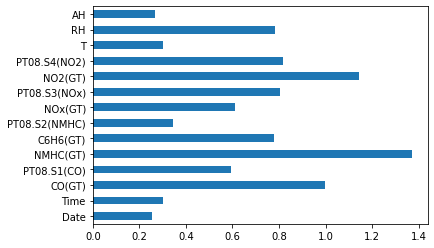

In [6]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(X,y)

ft = pd.Series(mi_score, cols)
ft.plot(kind='barh')
plt.show()

## Using Decision Trees

In [23]:
# from sklearn.ensemble import ExtraTreesClassifier

# model = ExtraTreesClassifier()
# model.fit(X, y)

# ft = pd.Series(model.feature_importances_, cols)
# ft.plot(kind='barh')
# plt.show()

## Using correlation

<AxesSubplot:>

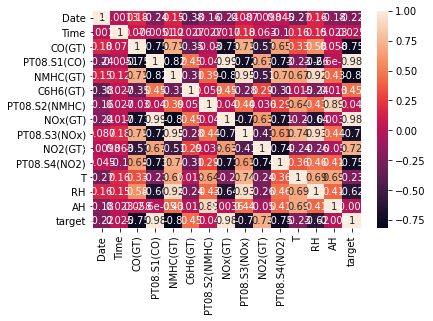

In [7]:
import seaborn as sns

df = pd.DataFrame(X)
df['target'] = y

cor = df.corr()
plt.figure()
sns.heatmap(cor, annot=True)

# Dimensionality Reduction

In [8]:
# preparing dataset
import numpy as np
import matplotlib.pyplot as plt

n_samples, n_features = X.shape
X.shape

(9357, 15)

In [9]:
def embedding_plot(X, title):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10,10))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=y/10.)

    plt.xticks([]), plt.yticks([])
    plt.legend(handles=sc.legend_elements()[0], labels=[i for i in range(10)])
    plt.title(title)

## PCA

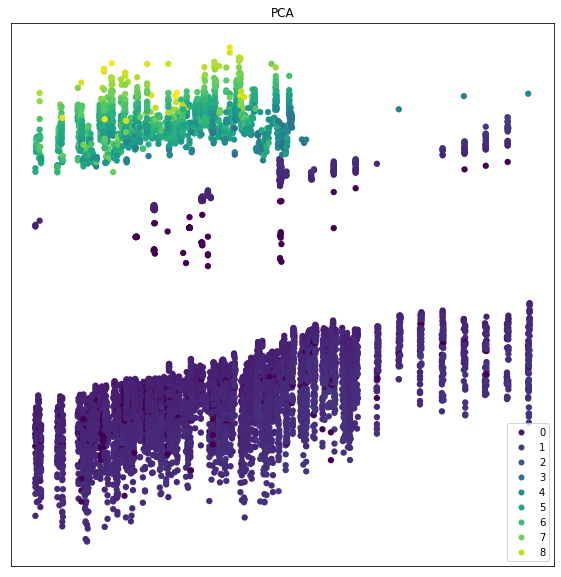

In [10]:
from sklearn import decomposition

X_pca = decomposition.PCA(n_components=2).fit_transform(X)
embedding_plot(X_pca, "PCA")
plt.show()

## LDA

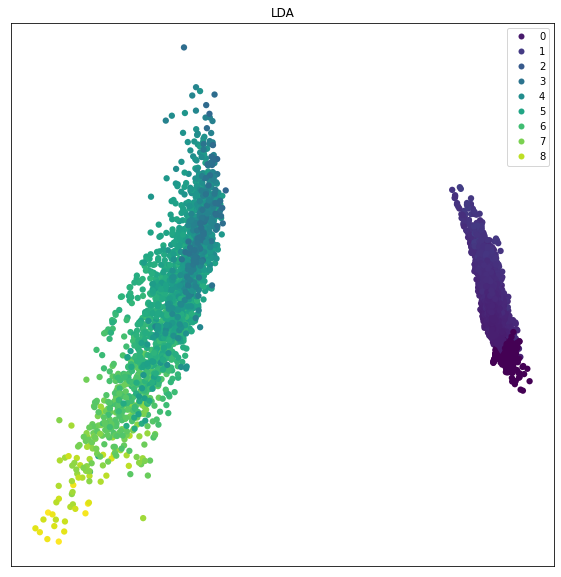

In [11]:
from sklearn import discriminant_analysis

X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
embedding_plot(X_lda, "LDA")
plt.show()

## t-SNE

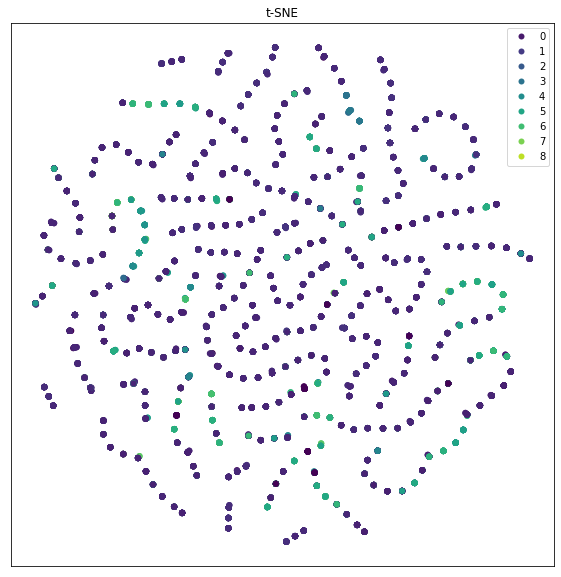

In [12]:
from sklearn import manifold

X_tsne = manifold.TSNE(n_components=2, init='random').fit_transform(X)
embedding_plot(X_tsne,"t-SNE")
plt.show()

# Data Transformation (encodings)

In [14]:
# preparing dataset
import pandas as pd

flight_id = [512, 162, 151, 621, 163, 625]
destination = ['Spain', 'France', 'Spain', 'Germany', 'France', 'India']

df = pd.DataFrame(list(zip(flight_id, destination)),
                  columns=['flight_id', 'destination'])
df

,flight_id,destination
0,512,Spain
1,162,France
2,151,Spain
3,621,Germany
4,163,France
5,625,India


## Label encoding

It refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [14]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['dest_label'] = labelencoder.fit_transform(df['destination'])
df

,flight_id,destination,dest_label
0,512,Spain,3
1,162,France,0
2,151,Spain,3
3,621,Germany,1
4,163,France,0
5,625,India,2


## One-Hot encoding

Using label encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [15]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

enc_df = pd.DataFrame(enc.fit_transform(df[['dest_label']]).toarray())
# enc_df
df = df.join(enc_df)
df

,flight_id,destination,dest_label,0,1,2,3
0,512,Spain,3,0.0,0.0,0.0,1.0
1,162,France,0,1.0,0.0,0.0,0.0
2,151,Spain,3,0.0,0.0,0.0,1.0
3,621,Germany,1,0.0,1.0,0.0,0.0
4,163,France,0,1.0,0.0,0.0,0.0
5,625,India,2,0.0,0.0,1.0,0.0


# Feature Selection

Here are some of the benefits of applying feature selection to a dataset:

- Space required to store the data is reduced as the number of dimensions comes down
- Less dimensions lead to less computation/training time
- Some algorithms do not perform well when we have a large dimensions. So reducing these dimensions needs to happen for the algorithm to be useful
- It takes care of multicollinearity by removing redundant features. For example, you have two variables – ‘time spent on treadmill in minutes’ and ‘calories burnt’. These variables are highly correlated as the more time you spend running on a treadmill, the more calories you will burn. Hence, there is no point in storing both as just one of them does what you require
- It helps in visualizing data. As discussed earlier, it is very difficult to visualize data in higher dimensions so reducing our space to 2D or 3D may allow us to plot and observe patterns more clearly

In [2]:
# preparing dataset
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

## Using Mutual Information

Mutual information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.



In [31]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(X,y)

ft = pd.Series(mi_score, cols)
ft.plot(kind='barh')
plt.show()

ValueError: Length of passed values is 15, index implies 14.

## Using Decision Trees

Methods that use ensembles of decision trees (like Random Forest or Extra Trees) can also compute the relative importance of each attribute. These importance values can be used to inform a feature selection process.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)

ft = pd.Series(model.feature_importances_, cols)
ft.plot(kind='barh')
plt.show()

## Using correlation

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.


In [ ]:
import seaborn as sns

df = pd.DataFrame(X)
df['target'] = y

cor = df.corr()
plt.figure()
sns.heatmap(cor, annot=True)

# Dimensionality Reduction

Dimensionality reduction is a type of learning where we want to take higher-dimensional data, like images, and represent them in a lower-dimensional space.Most dimensionality reduction techniques aim to find some hyperplane, which is just a higher-dimensional version of a line, to project the points onto. We can imagine a projection as taking a flashlight perpendicular to the hyperplane we’re projecting onto and plotting where the shadows fall on that hyperplane. 

In [32]:
# preparing dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
X.shape


(1797, 64)

In [33]:
def embedding_plot(X, title):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10,10))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=y/10.)

    plt.xticks([]), plt.yticks([])
    plt.legend(handles=sc.legend_elements()[0], labels=[i for i in range(10)])
    plt.title(title)

## PCA

One technique of dimensionality reduction is called principal component analysis (PCA). The idea behind PCA is that we want to select the hyperplane in the higher dimensional space such that, when all the points are projected onto it, they are maximally spread out.

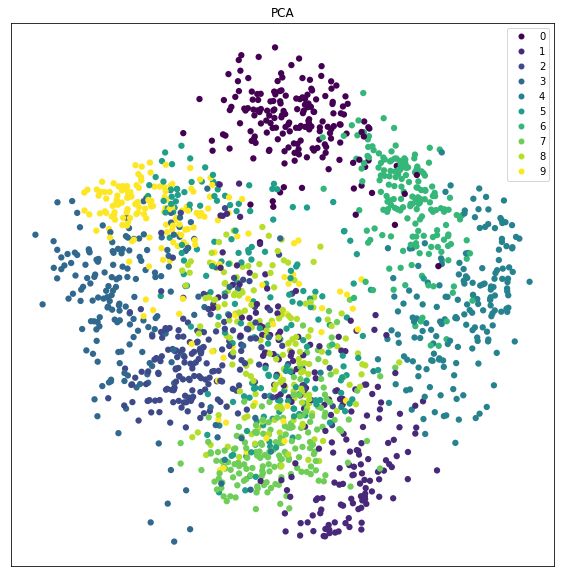

In [34]:
from sklearn import decomposition

X_pca = decomposition.PCA(n_components=2).fit_transform(X)
embedding_plot(X_pca, "PCA")
plt.show()

## LDA

Similar to PCA, we want to find the best hyperplane and project our data onto it. However, there is one big distinction: LDA is supervised! We want the axis of maximum class separation! In other words, we want the axis that separates the classes with the maximum margin of separation.

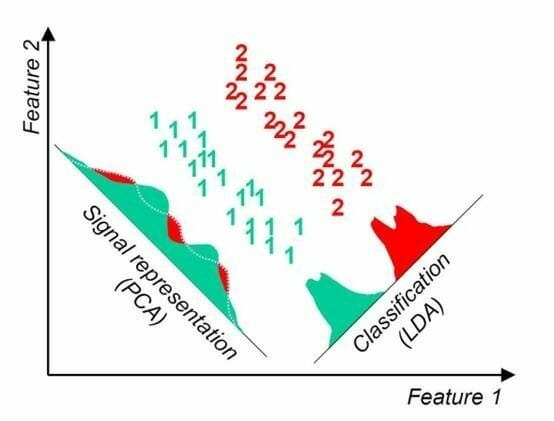

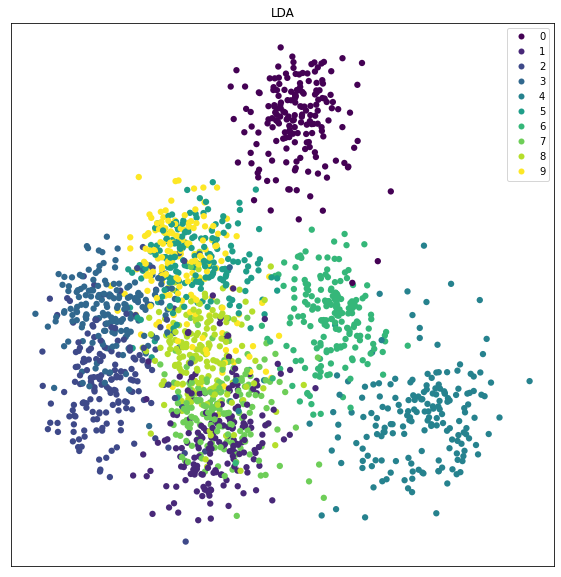

In [35]:
from sklearn import discriminant_analysis

X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
embedding_plot(X_lda, "LDA")
plt.show()

## t-SNE

A more recent dimensionality reduction technique that’s been widely adopted is t-Distributed Stochastic Neighbor Embedding (t-SNE) At a high level, t-SNE aims to minimize the divergence between two distributions: the pairwise similarity of the points in the higher-dimensional space and the pairwise similarity of the points in the lower-dimensional space.

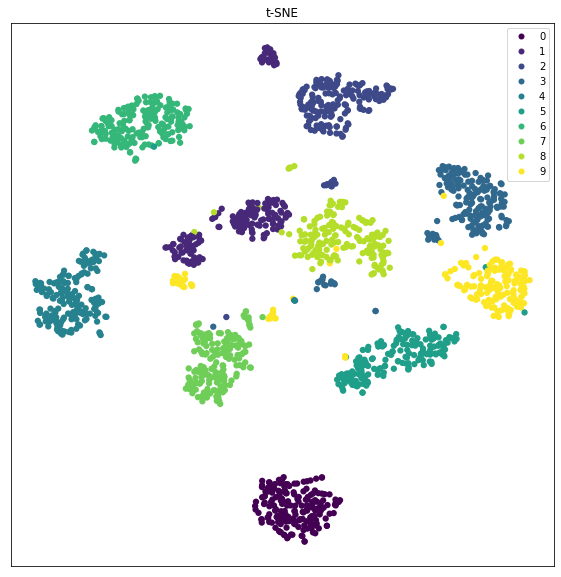

In [36]:
from sklearn import manifold

X_tsne = manifold.TSNE(n_components=2, init='random').fit_transform(X)
embedding_plot(X_tsne,"t-SNE")
plt.show()